In [214]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math

In [215]:
# Menampilkan Sampel Data Dan Melakukan Drop Column Tertarik
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
53075,0.957913,0.041243,0.044705,0.119618,1.070422,-1.049090,-1.000477,-0.145118,0.757866,1.307235,0
154458,-1.099543,-0.081027,0.044705,0.119618,-0.982998,0.755505,0.035602,1.734812,0.223363,-1.521893,0
201722,0.957913,-1.206342,0.044705,-0.588412,-0.982998,0.755505,1.051748,-0.805558,0.834224,-0.101205,1
6254,0.957913,-0.610587,0.044705,-0.431072,1.070422,-1.049090,-1.000477,-0.457834,0.757866,-0.235926,0
191345,-1.099543,0.041243,0.044705,1.142327,1.070422,-1.049090,-1.000477,-1.486135,0.757866,1.686902,0


In [216]:
# Mengecek Data Kosong
df.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## **Feature Selection**

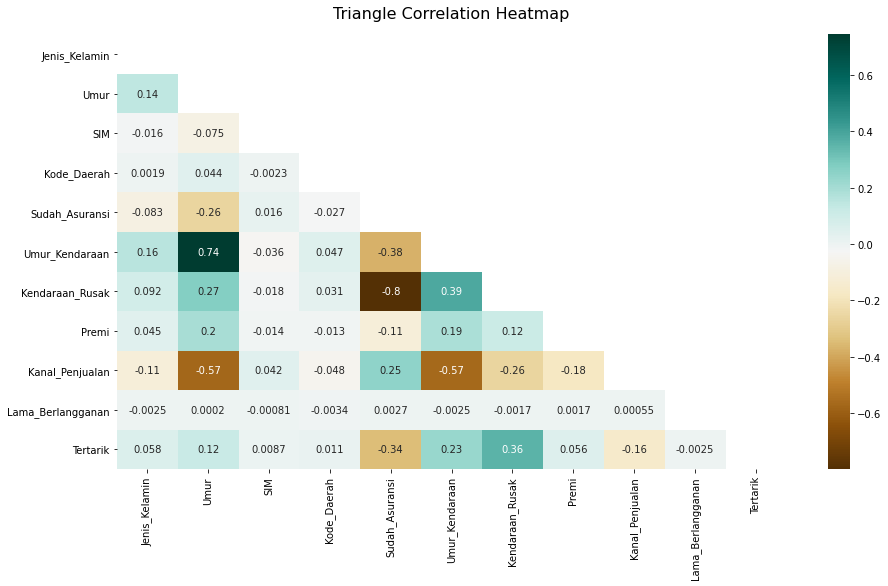

In [217]:
# Melihat Nilai Korelasi Antar Variable Dengan Heatmap
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()


In [218]:
df = df[['Umur', 'Kanal_Penjualan']]
df.head()

,Umur,Kanal_Penjualan
0,-0.544392,0.757866
1,0.647118,-1.590130
2,-1.140147,0.910581
3,0.779508,-0.463855
4,-1.140147,0.757866


In [219]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(df))

Total Data : 230631


## **K-MEANS Algorithm**

In [220]:
# Mendefinisikan Metode Euclidean Untuk Perhitungan Jarak Dari Centroid
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))


def kmeans(k, max_iter, df):
     
    # Inisialisasi Dictionary Centroid Kemudian Memilih Centroid Secara Random Pada Data 
    # Sesuai Banyaknya Cluster Yang Didefinisikan
    centroid = {i: df[random.randint(0, len(df))] for i in range(k)}
    print(f'Inisialisasi Centroid Random:\nCluster 0: {centroid.get(0)}, Cluster 1: {centroid.get(1)}, Cluster 2: {centroid.get(2)} \n')
    
    # Mengcopy Centroid Saat Ini Untuk Acuan Pemberhentian Proses Iterasi Centroid Maksimal
    temp_centroid = centroid.copy()

    for i in range(max_iter):
        # Mendefinisikan Dictionary Cluster Dan Mengisi Setiap Key 
        # Pada Cluster Berisi Array kosong, contoh : {0: [], 1: [], 2: []}
        cluster = {i: [] for i in range(k)}

        # Mencari Nilai Terdekat Pada Data Untuk Setiap Centroid Yang Telah Di Definisikan Sebelumnya
        # Menggunakan Metode Euclidean Dan Mencari Nilai Minimum Pada Setiap Distance 
        # Untuk Dimasukkan Kedalam Dictionary Cluster
        for x in df:
            dist = [euclidean(x, centroid[c]) for c in centroid]
            cluster[dist.index(min(dist))].append(x)

        # Mencari Nilai Centroid Ulang Dari Setiap Cluster 
        # Yang Telah Dicari Sebelumnya Menggunakan Mean 
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)

        print(f'Iterasi Centroid Ke-{i+1}:\nCluster 0: {centroid.get(0)}, Cluster 1: {centroid.get(1)}, Cluster 2: {centroid.get(2)} \n')
        
        # Pemberhentian Proses Iterasi Ketika Centroid Saat Ini Sama Dengan Nilai Centroid Sebelumnya
        # Dilakukan Dengan Pengecekan Masing-Masing Value Dari Dictionary
        if ((temp_centroid.get(0) == centroid.get(0))[0] and 
            (temp_centroid.get(1) == centroid.get(1))[0] and 
            (temp_centroid.get(2) == centroid.get(2))[0] and
            (temp_centroid.get(3) == centroid.get(3))[0]):
            break

        # Mengcopy Centroid Yang Telah Berubah Dari Perhitungan Sebelumnya
        temp_centroid = centroid.copy()

    # Mengembalikan Nilai Dari Variabel Centroid Dan Cluster
    return centroid, cluster


## **Main Program**

In [221]:
# Merubah DataFrame Menjadi Numpy Array
data = df.to_numpy()

# Memasukkan Nilai K dan Maksimum Iterasi
k = 4
max_iter = 50

# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster = kmeans(k, max_iter, data)

Inisialisasi Centroid Random:
Cluster 0: [ 0.71331338 -1.64739771], Cluster 1: [-0.01483165 -1.64739771], Cluster 2: [ 1.97101845 -1.99100683] 

Iterasi Centroid Ke-1:
Cluster 0: [ 0.68962779 -0.76529359], Cluster 1: [-0.60083743  0.36580534], Cluster 2: [ 2.26167847 -1.71337439] 

Iterasi Centroid Ke-2:
Cluster 0: [ 0.42176498 -1.20521986], Cluster 1: [-0.63910573  0.63904538], Cluster 2: [ 1.85261454 -1.6801537 ] 

Iterasi Centroid Ke-3:
Cluster 0: [ 0.31382376 -1.62748596], Cluster 1: [-0.64549791  0.63477969], Cluster 2: [ 1.76109573 -1.66696086] 

Iterasi Centroid Ke-4:
Cluster 0: [ 0.28614169 -1.64674506], Cluster 1: [-0.70204549  0.65494614], Cluster 2: [ 1.71841479 -1.65940434] 

Iterasi Centroid Ke-5:
Cluster 0: [ 0.28512689 -1.64841408], Cluster 1: [-0.72603394  0.66400558], Cluster 2: [ 1.71694068 -1.65759185] 

Iterasi Centroid Ke-6:
Cluster 0: [ 0.28512918 -1.64853429], Cluster 1: [-0.74323454  0.67359057], Cluster 2: [ 1.71697627 -1.65742641] 

Iterasi Centroid Ke-7:
Clus

## **Hasil Proses Cluster Final**

In [222]:
# Inisialisasi Array Untuk Dat Cluster
df = []

# Melakukan Perulangan Untuk Setiap Key Pada Data
# Hasil Proses K-Means Untuk Diinputkan Kedalam Array Cluster (df)
for key in cluster.keys():
    for c in cluster.get(key):
        df.append((c[0], c[1], key))

# Set Array df menjadi dataframe, Menamakan nama kolom dan menampilkannya
df = pd.DataFrame(df)
df.columns = ['Umur', 'Kanal_Penjualan', 'Cluster']
df.sample(8)

,Umur,Kanal_Penjualan,Cluster
85402,-0.875367,0.757866,1
75362,-0.742977,0.757866,1
198825,1.044288,0.223363,3
21843,-0.081027,-1.647398,0
51009,-1.073952,0.757866,1
186039,0.041243,0.223363,3
10576,0.647118,-1.017448,0
56174,-0.809172,0.757866,1


In [223]:
# Menampilkan Letak Seluruh Centroids
for i in range(k):
    print(f'Centroid {i+1} :', centroid[i])

Centroid 1 : [ 0.28513035 -1.64867879]
Centroid 2 : [-0.78901596  0.69582138]
Centroid 3 : [ 1.71871496 -1.65421081]
Centroid 4 : [0.82485065 0.27163228]


In [224]:
# Memetakkan Nilai X Dan Y Untuk Setiap Data Pada Dictionary Cluster
clusterize = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster.items()]))

# Membuat Nama Kolom Cluster Berdasarkan Jumlah Cluster Pada Clusterize
col = []
for i in range(len(clusterize.columns)):
    col.append('Cluster ' + str(i + 1))

# Melakukan Set Nama Kolom Dan Menampilkan Sample Data Cluster
clusterize.columns = col
clusterize.sample(8)


,Cluster 1,Cluster 2,Cluster 3,Cluster 4
35130,"[0.3161433628941977, -1.6473977076678736]","[-0.2134166641036048, 0.1851842578530262]",NaN,"[0.7133133831425497, 0.1851842578530262]"
29852,"[0.041243277672602, -1.6473977076678736]","[-0.7429766911014074, 0.7578661220783074]",NaN,"[1.9710184472623309, 0.8533130994491877]"
94551,NaN,"[-1.073951707975034, 0.7578661220783074]",NaN,NaN
75017,NaN,"[-1.1401467113497594, 0.9105812858717156]",NaN,NaN
76683,NaN,"[-1.2063417147244848, 0.9105812858717156]",NaN,NaN
34420,"[0.3161433628941977, -1.6473977076678736]","[-0.8753666978508581, 0.7578661220783074]",NaN,"[0.8457033898920003, 0.7578661220783074]"
52250,NaN,"[-0.4120016742277808, 0.2233630488013783]",NaN,"[0.2499483595194724, 0.2233630488013783]"
116052,NaN,"[-0.8091716944761328, 0.7578661220783074]",NaN,NaN


## **Visualisasi Cluster**

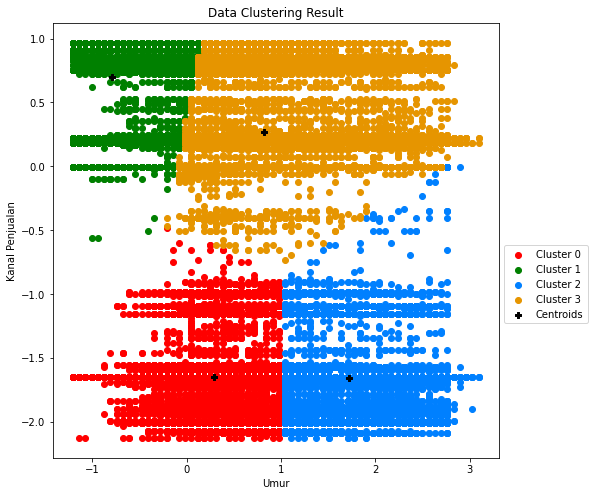

In [225]:
# Set Warna Setiap CLuster
colors = ['r', 'g', '#0080ff', '#e69500', '#e89500']

# Set Ukuran Dan Judul Plot
plt.figure(figsize=(8, 8))
plt.title('Data Clustering Result')

# Melakukan Looping Setiap Titik Data Dan Centroid
for i in range(k):
    plt.scatter(
        df['Umur'][df['Cluster'] == i], 
        df['Kanal_Penjualan'][df['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )

    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')

# Acuan Penampilan Label Centroid
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')

# Set Nama Label X Dan Y Pada Plot Dan Set Tempat Legend Ditampilkan
plt.xlabel("Umur")
plt.ylabel("Kanal Penjualan")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


## **Evaluasi Model**

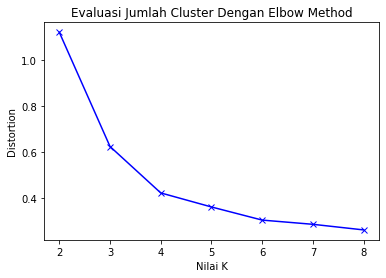

In [226]:
# Inisialisasi Array Untuk Distortion
distortions = []

# Inisialisasi Range K
K = range(2, 9)

# Melakukan Perulangan Untuk Setiap Range
for i in K:
    # Membangun Dan Fit Dataset
    model = KMeans(n_clusters=i).fit(df)
    model.fit(df)

    # Memasukkan Hasil Dari Jumlah cdist data, cluster_center Ke Array
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot data
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Distortion')
plt.title('Evaluasi Jumlah Cluster Dengan Elbow Method')
plt.show()